# 

# 서울특별시 공공자전거 이용정보 데이터 분석

* 사용 데이터: 서울특별시 공공자전거 이용정보(월별)
* 데이터 측정 기간: 2024년 7월~12월

# 1. 데이터 불러오기

In [109]:
import pandas as pd

data = pd.read_csv('data/서울특별시 공공자전거 이용정보(월별)_24.7-12.csv', encoding='CP949')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 619664 entries, 0 to 619663
Data columns (total 11 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   대여일자     619664 non-null  int64  
 1   대여소번호    619664 non-null  int64  
 2   대여소명     619664 non-null  object 
 3   대여구분코드   619664 non-null  object 
 4   성별       424280 non-null  object 
 5   연령대코드    619664 non-null  object 
 6   이용건수     619664 non-null  int64  
 7   운동량      619269 non-null  float64
 8   탄소량      619269 non-null  float64
 9   이동거리(M)  619664 non-null  float64
 10  이용시간(분)  619664 non-null  int64  
dtypes: float64(3), int64(4), object(4)
memory usage: 52.0+ MB


# 2. 데이터 정보 확인하기

In [110]:
data.head(10)

,대여일자,대여소번호,대여소명,대여구분코드,성별,연령대코드,이용건수,운동량,탄소량,이동거리(M),이용시간(분)
0,202407,102,102. 망원역 1번출구 앞,일일권,NaN,20대,67,4304.28,40.87,176252.62,1895
1,202407,102,102. 망원역 1번출구 앞,일일권,NaN,30대,64,4142.09,38.92,167774.15,1498
2,202407,102,102. 망원역 1번출구 앞,일일권,NaN,40대,2,265.91,2.11,9098.64,64
3,202407,102,102. 망원역 1번출구 앞,일일권,NaN,50대,6,648.52,5.11,22048.26,149
4,202407,102,102. 망원역 1번출구 앞,일일권,NaN,60대,1,35.37,0.31,1333.18,6
5,202407,102,102. 망원역 1번출구 앞,일일권,NaN,기타,23,1922.74,19.53,84195.84,791
6,202407,102,102. 망원역 1번출구 앞,일일권,F,20대,107,6962.47,71.10,306432.47,3196
7,202407,102,102. 망원역 1번출구 앞,일일권,F,30대,56,3495.03,36.17,158678.07,1437
8,202407,102,102. 망원역 1번출구 앞,일일권,F,40대,22,1210.75,11.79,50823.34,470
9,202407,102,102. 망원역 1번출구 앞,일일권,F,50대,1,96.70,1.01,4360.70,37


# 3. 결측치 확인하기

In [111]:
# 둘은 동일
data.isna().sum()
data.isnull().sum()

대여일자            0
대여소번호           0
대여소명            0
대여구분코드          0
성별         195384
연령대코드           0
이용건수            0
운동량           395
탄소량           395
이동거리(M)         0
이용시간(분)         0
dtype: int64

# 4. 데이터형 변환

In [112]:
# describe()를 활용해서는 숫자 data만 통계가 진행되므로
# 불필요한 data는 숫자 data에서 object로 미리 변환

# 기준 데이터가 월별이라 일별로 변환할 필요는 없음
# pd.to_datetime(data['대여일자'], format='%Y%m')

# 재할당 필요
data1 = data.astype({'대여일자' : 'object', '대여소번호':'object'}) 
data1.dtypes

대여일자        object
대여소번호       object
대여소명        object
대여구분코드      object
성별          object
연령대코드       object
이용건수         int64
운동량        float64
탄소량        float64
이동거리(M)    float64
이용시간(분)      int64
dtype: object

In [113]:
data1['성별'].unique() # array([nan, 'F', 'M', 'm', 'f'], dtype=object)
# 성별
# 결측치가 많음
# 대소문자 혼재

data1['성별'] = data['성별'].str.upper()
data1['성별'] = data1['성별'].fillna('O')
data1['성별'].unique()

array(['O', 'F', 'M'], dtype=object)

In [114]:
data1.isna().sum()

대여일자         0
대여소번호        0
대여소명         0
대여구분코드       0
성별           0
연령대코드        0
이용건수         0
운동량        395
탄소량        395
이동거리(M)      0
이용시간(분)      0
dtype: int64

# 5. 데이터 탐색

<div>
    <img src="https://www.dropbox.com/scl/fi/3s8gvus21mqhcbqkz38zf/.png?rlkey=1kw3p6nleovg9dw6m82ik9izo&dl=1" width="50%">
</div>

## 1) 새로운 열 만들기

In [115]:
# 건당 이동거리, 건당 이용시간 열을 추가
# 건당 이동거리 = 이동거리 / 건수
# 건당 이용시간 = 이용시간 / 건수

data1['건당 이동거리(M)'] = data1['이동거리(M)'] / data1['이용건수']
data1['건당 이용시간(분)'] = data1['이용시간(분)'] / data1['이용건수']

In [116]:
test_data = data1.head(6)

# 평균 이동거리(raw data 연산)
test_data['이동거리(M)'].sum() / test_data['이용건수'].sum()

np.float64(2826.3968711656444)

In [117]:
#건당 이동거리(평균의 평균) - 한집단의 값이 극단치가 되면 결과가 왜곡됨

test_data['건당 이동거리(M)'].mean()

np.float64(3078.334318134193)

## 2) 데이터 요약 및 시각화

In [118]:
import seaborn as sns
import matplotlib.pyplot as plt
import koreanize_matplotlib 

# 연령대별 이용건수
# 대여소 별 이용건수
# 대여일자별 대여 수
# 월별 어느 연령대가 가장 많이 이용했는가
# 각 대여소별 평균 이동 거리를 분석하여 용도 추론
# 대여소별 이용자 연령대
# 대여소별 이용건수
# 연령대별 이용건수가 많은 상위 대여소 리스트
# 대여소별 건당 이용시간 평균
# 수거 용이 시간 분석

# Hint: .groupby(), .pivot_table(), .crosstab()

In [119]:
# 대여일자 행의 갯수를 구해보기
data1['대여일자'].value_counts().sort_index()
data1['대여일자'].value_counts().sort_values(ascending = False)

대여일자
202410    108791
202409    107191
202411    103677
202407    103502
202408    103316
202412     93187
Name: count, dtype: int64

In [120]:
# 성별이 남자인 사람의 평균 이동거리, 평균 이용시간

data2 = data1[data1['성별'] == 'M']
data2[['건당 이동거리(M)', '건당 이용시간(분)']].mean() # 평균의 평균

건당 이동거리(M)    2668.111610
건당 이용시간(분)      23.170525
dtype: float64

In [121]:
# 성별 평균 이동거리, 이동시간

data1.groupby('성별')[['이동거리(M)', '이용시간(분)']].mean()

,이동거리(M),이용시간(분)
성별,,
F,66747.306317,633.006691
M,105159.953358,929.781992
O,69788.506640,635.282014


In [122]:
data1.groupby("성별")["이동거리(M)"].agg(func=["mean", "min", "max"])

data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 619664 entries, 0 to 619663
Data columns (total 13 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   대여일자        619664 non-null  object 
 1   대여소번호       619664 non-null  object 
 2   대여소명        619664 non-null  object 
 3   대여구분코드      619664 non-null  object 
 4   성별          619664 non-null  object 
 5   연령대코드       619664 non-null  object 
 6   이용건수        619664 non-null  int64  
 7   운동량         619269 non-null  float64
 8   탄소량         619269 non-null  float64
 9   이동거리(M)     619664 non-null  float64
 10  이용시간(분)     619664 non-null  int64  
 11  건당 이동거리(M)  619664 non-null  float64
 12  건당 이용시간(분)  619664 non-null  float64
dtypes: float64(5), int64(2), object(6)
memory usage: 61.5+ MB


In [123]:
# 연령대별 이용건수
data1.groupby('연령대코드')['이용건수'].sum().sort_index()

# 대여소별 이용건수
data1.groupby('대여소명')['이용건수'].sum()

# 대여일자별 대여수
data1.groupby('대여일자')['이용건수'].count()

대여일자
202407    103502
202408    103316
202409    107191
202410    108791
202411    103677
202412     93187
Name: 이용건수, dtype: int64

In [124]:
# 연령대별 이동거리, 이용시간의 평균
data1.groupby('연령대코드')[['건당 이동거리(M)', '건당 이용시간(분)']].mean()

,건당 이동거리(M),건당 이용시간(분)
연령대코드,,
20대,2451.222047,21.016007
30대,2586.120784,22.738673
40대,2878.267933,26.427358
50대,2944.130292,26.260852
60대,2802.546744,26.851123
70대이상,2555.291328,26.713537
~10대,2446.854491,22.019562
기타,2837.790135,26.163822


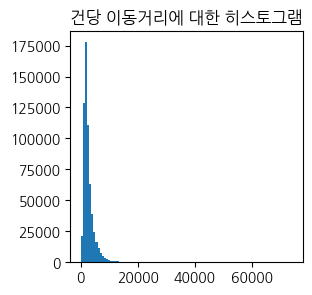

In [125]:
import matplotlib.pyplot as plt
import koreanize_matplotlib

# 건당 이동거리에 대한 히스토스램, 상자 그리기
plt.figure(figsize=(3,3))
plt.hist(data1['건당 이동거리(M)'], bins=100)
plt.title('건당 이동거리에 대한 히스토그램')
plt.show()

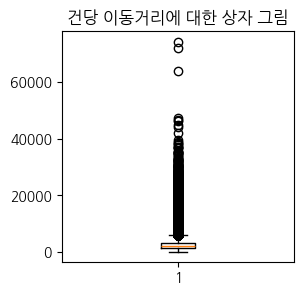

In [126]:
plt.figure(figsize=(3,3))
plt.boxplot(x=data1['건당 이동거리(M)'])
plt.title('건당 이동거리에 대한 상자 그림')
plt.show()

# 4) 지도시각화

In [127]:
mdata = pd.read_csv('data/공공자전거 대여소 정보(api수집).csv')
mdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3170 entries, 0 to 3169
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   STA_LOC      3170 non-null   object 
 1   RENT_ID      3170 non-null   object 
 2   RENT_NO      3170 non-null   int64  
 3   RENT_NM      3170 non-null   object 
 4   RENT_ID_NM   3170 non-null   object 
 5   HOLD_NUM     3155 non-null   float64
 6   STA_ADD1     3170 non-null   object 
 7   STA_ADD2     1281 non-null   object 
 8   STA_LAT      3170 non-null   float64
 9   STA_LONG     3170 non-null   float64
 10  START_INDEX  3170 non-null   int64  
 11  END_INDEX    3170 non-null   int64  
 12  RNUM         3170 non-null   int64  
dtypes: float64(3), int64(4), object(6)
memory usage: 322.1+ KB


In [128]:
mdata.head(10)

mdata1 = mdata.astype({'RENT_NO' : 'object'})

mdata1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3170 entries, 0 to 3169
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   STA_LOC      3170 non-null   object 
 1   RENT_ID      3170 non-null   object 
 2   RENT_NO      3170 non-null   object 
 3   RENT_NM      3170 non-null   object 
 4   RENT_ID_NM   3170 non-null   object 
 5   HOLD_NUM     3155 non-null   float64
 6   STA_ADD1     3170 non-null   object 
 7   STA_ADD2     1281 non-null   object 
 8   STA_LAT      3170 non-null   float64
 9   STA_LONG     3170 non-null   float64
 10  START_INDEX  3170 non-null   int64  
 11  END_INDEX    3170 non-null   int64  
 12  RNUM         3170 non-null   int64  
dtypes: float64(3), int64(3), object(7)
memory usage: 322.1+ KB


In [129]:
import folium as fo

# rent_no = mdata1['RENT_NO']
# rent_id_nm = mdata1['RENT_ID_NM']
# sat_lat = mdata1['STA_LAT']
# sta_long = mdata1['STA_LONG']

# print(rent_no)
# print(rent_id_nm)
# print(sat_lat) 
# print(sta_long)

sub_data = mdata1.rename(columns={'RENT_ID':'대여소번호', 'RENT_ID_NM':'대여소명', 'STA_LAT':'위도', 'STA_LONG':'경도'})
sub_data

,STA_LOC,대여소번호,RENT_NO,RENT_NM,대여소명,HOLD_NUM,STA_ADD1,STA_ADD2,위도,경도,START_INDEX,END_INDEX,RNUM
0,마포구,ST-10,108,서교동 사거리,108. 서교동 사거리,12.0,서울특별시 마포구 양화로 93,427,37.552746,126.918617,0,0,1
1,광진구,ST-100,503,더샵스타시티 C동 앞,503. 더샵스타시티 C동 앞,15.0,서울특별시 광진구 아차산로 262,더샵스타시티 C동 앞,37.536667,127.073593,0,0,2
2,양천구,ST-1000,729,서부식자재마트 건너편,729. 서부식자재마트 건너편,10.0,서울특별시 양천구 신정동 236,서부식자재마트 건너편,37.510380,126.866798,0,0,3
3,양천구,ST-1002,731,서울시 도로환경관리센터,731. 서울시 도로환경관리센터,10.0,서울특별시 양천구 목동동로 316-6,서울시 도로환경관리센터,37.529900,126.876541,0,0,4
4,양천구,ST-1003,732,신월중학교,732. 신월중학교,10.0,서울특별시 양천구 화곡로 59,신월동 이마트,37.539551,126.828300,0,0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3165,양천구,ST-993,722,경서농협 버스정류장(우리은행신정동지점방향),722. 경서농협 버스정류장(우리은행신정동지점방향),10.0,서울특별시 양천구 신월로 342-1 구두수선대19,NaN,37.521511,126.857384,0,0,3166
3166,양천구,ST-994,723,SBS방송국,723. SBS방송국,15.0,서울특별시 양천구 목동서로161,SBS방송국,37.529163,126.872749,0,0,3167
3167,양천구,ST-995,724,계남공원 입구 주출입구 좌측,724. 계남공원 입구 주출입구 좌측,10.0,서울특별시 양천구 중앙로 153 공중화장실,NaN,37.510597,126.857323,0,0,3168
3168,양천구,ST-996,725,양강중학교앞 교차로,725. 양강중학교앞 교차로,15.0,서울특별시 양천구 남부순환로88길5-16,양강중학교앞 교차로,37.524334,126.850548,0,0,3169


In [130]:
data1.info()

summary_data = data1.groupby('대여소명')[['이동거리(M)', '이용시간(분)', '이용건수']].sum()
summary_data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 619664 entries, 0 to 619663
Data columns (total 13 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   대여일자        619664 non-null  object 
 1   대여소번호       619664 non-null  object 
 2   대여소명        619664 non-null  object 
 3   대여구분코드      619664 non-null  object 
 4   성별          619664 non-null  object 
 5   연령대코드       619664 non-null  object 
 6   이용건수        619664 non-null  int64  
 7   운동량         619269 non-null  float64
 8   탄소량         619269 non-null  float64
 9   이동거리(M)     619664 non-null  float64
 10  이용시간(분)     619664 non-null  int64  
 11  건당 이동거리(M)  619664 non-null  float64
 12  건당 이용시간(분)  619664 non-null  float64
dtypes: float64(5), int64(2), object(6)
memory usage: 61.5+ MB


,이동거리(M),이용시간(분),이용건수
대여소명,,,
1001. 광진교 남단 사거리(천호공원 방면),22579951.13,212018,9762
1002. 해공공원(천호동),37190390.67,349509,15322
1003. 해공도서관앞,14033033.55,155349,7385
1004. 삼성광나루아파트 버스정류장,32114486.56,309776,10468
1006. 롯데캐슬 115동앞,2869819.58,26311,1540
...,...,...,...
992.북한산입구 정류장,3876214.34,28775,993
993.은평뉴타운 은뜨락아파트앞,3651995.73,37174,2097
994.북한산생태공원입구(교통섬),2842205.41,24495,1639


In [131]:
summary_data = summary_data.reset_index()
summary_data

,대여소명,이동거리(M),이용시간(분),이용건수
0,1001. 광진교 남단 사거리(천호공원 방면),22579951.13,212018,9762
1,1002. 해공공원(천호동),37190390.67,349509,15322
2,1003. 해공도서관앞,14033033.55,155349,7385
3,1004. 삼성광나루아파트 버스정류장,32114486.56,309776,10468
4,1006. 롯데캐슬 115동앞,2869819.58,26311,1540
...,...,...,...,...
2780,992.북한산입구 정류장,3876214.34,28775,993
2781,993.은평뉴타운 은뜨락아파트앞,3651995.73,37174,2097
2782,994.북한산생태공원입구(교통섬),2842205.41,24495,1639
2783,995.은평다목적체육관,4923604.57,44168,2544


In [138]:
# # 반복문 이해하기
lat_list = []  # 위도
long_list = [] # 경도

for name in summary_data["대여소명"].tolist():
    try:
        lat_value = sub_data.loc[sub_data["대여소명"]==name, "위도"]
        long_value = sub_data.loc[sub_data["대여소명"]==name, "경도"]

        lat_list.append(lat_value)
        long_list.append(long_value)
    except:
        lat_value = None
        long_value = None
        print("데이터를 찾을 수 없습니다.")

summary_data["위도"] = lat_list
summary_data["경도"] = long_list

# summary_data = pd.merge(summary_data, sub_data, on='대여소명', how='left')

summary_data

,대여소명,이동거리(M),이용시간(분),이용건수,위도,경도
0,1001. 광진교 남단 사거리(천호공원 방면),22579951.13,212018,9762,"2642 37.541794 Name: 위도, dtype: float64","2642 127.124748 Name: 경도, dtype: float64"
1,1002. 해공공원(천호동),37190390.67,349509,15322,"2643 37.545265 Name: 위도, dtype: float64","2643 127.125938 Name: 경도, dtype: float64"
2,1003. 해공도서관앞,14033033.55,155349,7385,"2644 37.543957 Name: 위도, dtype: float64","2644 127.125488 Name: 경도, dtype: float64"
3,1004. 삼성광나루아파트 버스정류장,32114486.56,309776,10468,"2645 37.553329 Name: 위도, dtype: float64","2645 127.128868 Name: 경도, dtype: float64"
4,1006. 롯데캐슬 115동앞,2869819.58,26311,1540,"2646 37.554867 Name: 위도, dtype: float64","2646 127.142799 Name: 경도, dtype: float64"
...,...,...,...,...,...,...
2780,992.북한산입구 정류장,3876214.34,28775,993,"1279 37.658287 Name: 위도, dtype: float64","1279 126.945297 Name: 경도, dtype: float64"
2781,993.은평뉴타운 은뜨락아파트앞,3651995.73,37174,2097,"1280 37.630287 Name: 위도, dtype: float64","1280 126.919563 Name: 경도, dtype: float64"
2782,994.북한산생태공원입구(교통섬),2842205.41,24495,1639,"1281 37.610508 Name: 위도, dtype: float64","1281 126.938538 Name: 경도, dtype: float64"
2783,995.은평다목적체육관,4923604.57,44168,2544,"1282 37.631409 Name: 위도, dtype: float64","1282 126.925407 Name: 경도, dtype: float64"


In [133]:
# summary_data에서 이동거리가 많은 순으로 Top10 뽑기 data_d_top10

data_d_top10 = summary_data.sort_values('이동거리(M)', ascending=False).head(10)
print(data_d_top10)


                         대여소명       이동거리(M)  이용시간(분)   이용건수  \
1829         4217. 한강공원 망원나들목  3.539830e+08  2814405  65749   
2301  502. 자양(뚝섬한강공원)역 1번출구 앞  2.455384e+08  2074352  63557   
774         207. 여의나루역 1번출구 앞  2.027993e+08  1648615  39038   
2459          583. 청계천 생태교실 앞  1.935874e+08  1235396  30419   
2423            565. 옥수역 3번출구  1.932620e+08  1276284  29066   
1193               272. 당산육갑문  1.804158e+08  1322940  34325   
1188        2715.마곡나루역 2번 출구   1.395554e+08  1222774  98439   
796             2102. 봉림교 교통섬  1.380883e+08  1009331  38268   
178   1210. 롯데월드타워(잠실역2번출구 쪽)  1.274169e+08  1198697  61994   
1409           3511. 응봉역 1번출구  1.208717e+08   832153  21577   

                                              위도  \
1829  1977    37.555576
Name: 위도, dtype: float64   
2301   3161    37.53186
Name: 위도, dtype: float64   
774   2895    37.527157
Name: 위도, dtype: float64   
2459   2537    37.56797
Name: 위도, dtype: float64   
2423  2527    37.541367
Name: 위도, dtype: float

In [134]:
# summary_data에서 이용시간이 많은 순으로 Top10 뽑기 data_t_top10

summary_data.sort_values('이용시간(분)', ascending=False).head(10)

,대여소명,이동거리(M),이용시간(분),이용건수,위도,경도
1829,4217. 한강공원 망원나들목,3.539830e+08,2814405,65749,"1977 37.555576 Name: 위도, dtype: float64","1977 126.896889 Name: 경도, dtype: float64"
2301,502. 자양(뚝섬한강공원)역 1번출구 앞,2.455384e+08,2074352,63557,"3161 37.53186 Name: 위도, dtype: float64","3161 127.067192 Name: 경도, dtype: float64"
774,207. 여의나루역 1번출구 앞,2.027993e+08,1648615,39038,"2895 37.527157 Name: 위도, dtype: float64","2895 126.9319 Name: 경도, dtype: float64"
1193,272. 당산육갑문,1.804158e+08,1322940,34325,"2587 37.535339 Name: 위도, dtype: float64","2587 126.903679 Name: 경도, dtype: float64"
2423,565. 옥수역 3번출구,1.932620e+08,1276284,29066,"2527 37.541367 Name: 위도, dtype: float64","2527 127.017761 Name: 경도, dtype: float64"
2459,583. 청계천 생태교실 앞,1.935874e+08,1235396,30419,"2537 37.56797 Name: 위도, dtype: float64","2537 127.04689 Name: 경도, dtype: float64"
1188,2715.마곡나루역 2번 출구,1.395554e+08,1222774,98439,"1034 37.566925 Name: 위도, dtype: float64","1034 126.827438 Name: 경도, dtype: float64"
178,1210. 롯데월드타워(잠실역2번출구 쪽),1.274169e+08,1198697,61994,"3060 37.513126 Name: 위도, dtype: float64","3060 127.10096 Name: 경도, dtype: float64"
796,2102. 봉림교 교통섬,1.380883e+08,1009331,38268,"2867 37.484085 Name: 위도, dtype: float64","2867 126.926888 Name: 경도, dtype: float64"
938,230. 영등포구청역 1번출구,7.260118e+07,946392,52836,"2575 37.524635 Name: 위도, dtype: float64","2575 126.896217 Name: 경도, dtype: float64"


In [135]:
# summary_data에서 이용건수가 많은 순으로 Top10 뽑기 data_c_top10

summary_data.sort_values('이용건수', ascending=False).head(10)

,대여소명,이동거리(M),이용시간(분),이용건수,위도,경도
1188,2715.마곡나루역 2번 출구,1.395554e+08,1222774,98439,"1034 37.566925 Name: 위도, dtype: float64","1034 126.827438 Name: 경도, dtype: float64"
1200,2728.마곡나루역 3번 출구,9.318509e+07,752838,65977,"1049 37.565804 Name: 위도, dtype: float64","1049 126.828079 Name: 경도, dtype: float64"
1829,4217. 한강공원 망원나들목,3.539830e+08,2814405,65749,"1977 37.555576 Name: 위도, dtype: float64","1977 126.896889 Name: 경도, dtype: float64"
2301,502. 자양(뚝섬한강공원)역 1번출구 앞,2.455384e+08,2074352,63557,"3161 37.53186 Name: 위도, dtype: float64","3161 127.067192 Name: 경도, dtype: float64"
178,1210. 롯데월드타워(잠실역2번출구 쪽),1.274169e+08,1198697,61994,"3060 37.513126 Name: 위도, dtype: float64","3060 127.10096 Name: 경도, dtype: float64"
1175,2701. 마곡나루역 5번출구 뒤편,6.483893e+07,529924,59768,"698 37.565201 Name: 위도, dtype: float64","698 126.827316 Name: 경도, dtype: float64"
124,"1153. 발산역 1번, 9번 인근 대여소",8.286086e+07,750695,55671,"67 37.558949 Name: 위도, dtype: float64","67 126.837173 Name: 경도, dtype: float64"
938,230. 영등포구청역 1번출구,7.260118e+07,946392,52836,"2575 37.524635 Name: 위도, dtype: float64","2575 126.896217 Name: 경도, dtype: float64"
1428,3533. 건대입구역 사거리(롯데백화점),8.230525e+07,864711,40457,"636 37.539295 Name: 위도, dtype: float64","636 127.070786 Name: 경도, dtype: float64"
101,1124. 발산역 6번 출구 뒤,5.854875e+07,599263,40233,"2682 37.558178 Name: 위도, dtype: float64","2682 126.838455 Name: 경도, dtype: float64"


In [140]:
import folium

# 지도 출력하기
center = [37.565516, 126.978025] # 중심 위치
map = folium.Map(location=center, zoom_start=15)
map

In [137]:
for i in range(len(data_d_top10)):
    temp = data_d_top10.iloc[i]
    lat, lng = temp[["위도", "경도"]]

    folium.Marker(location=[lat, lng], icon=folium.Icon(color="red"), popup=temp.name).add_to(map)
map

c:\walker\code\eda-public-cycle\.venv\Lib\site-packages\folium\utilities.py:103: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(coord)
c:\walker\code\eda-public-cycle\.venv\Lib\site-packages\folium\utilities.py:109: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  if math.isnan(float(coord)):
c:\walker\code\eda-public-cycle\.venv\Lib\site-packages\folium\utilities.py:111: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  return [float(x) for x in coords]
c:\walker\code\eda-public-cycle\.venv\Lib\site-packages\folium\utilities.py:103: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(coord)
c:\walk

In [149]:
data_t_top10 = summary_data.sort_values('이용시간(분)', ascending=False).head(10)

print(data_t_top10)

for i in range(len(data_t_top10)):
    temp = data_t_top10.iloc[i]
    name, lat, lng = temp[['대여소명', '위도', '경도']]

    folium.Marker(location=[lat, lng], icon=folium.Icon(color="blue"), popup=name).add_to(map)

map

                         대여소명       이동거리(M)  이용시간(분)   이용건수  \
1829         4217. 한강공원 망원나들목  3.539830e+08  2814405  65749   
2301  502. 자양(뚝섬한강공원)역 1번출구 앞  2.455384e+08  2074352  63557   
774         207. 여의나루역 1번출구 앞  2.027993e+08  1648615  39038   
1193               272. 당산육갑문  1.804158e+08  1322940  34325   
2423            565. 옥수역 3번출구  1.932620e+08  1276284  29066   
2459          583. 청계천 생태교실 앞  1.935874e+08  1235396  30419   
1188        2715.마곡나루역 2번 출구   1.395554e+08  1222774  98439   
178   1210. 롯데월드타워(잠실역2번출구 쪽)  1.274169e+08  1198697  61994   
796             2102. 봉림교 교통섬  1.380883e+08  1009331  38268   
938          230. 영등포구청역 1번출구  7.260118e+07   946392  52836   

                                              위도  \
1829  1977    37.555576
Name: 위도, dtype: float64   
2301   3161    37.53186
Name: 위도, dtype: float64   
774   2895    37.527157
Name: 위도, dtype: float64   
1193  2587    37.535339
Name: 위도, dtype: float64   
2423  2527    37.541367
Name: 위도, dtype: float

c:\walker\code\eda-public-cycle\.venv\Lib\site-packages\folium\utilities.py:103: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(coord)
c:\walker\code\eda-public-cycle\.venv\Lib\site-packages\folium\utilities.py:109: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  if math.isnan(float(coord)):
c:\walker\code\eda-public-cycle\.venv\Lib\site-packages\folium\utilities.py:111: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  return [float(x) for x in coords]
c:\walker\code\eda-public-cycle\.venv\Lib\site-packages\folium\utilities.py:103: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(coord)
c:\walk

In [ ]:
data_u_top10 = summary_data.sort_values('이용건수', ascending=False).head(10)

data_u_top10